In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as pyplot

In [5]:
import image

In [6]:
import cv2

In [7]:
import os

In [8]:
scale=4

In [9]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [10]:
datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,horizontal_flip=True,vertical_flip=True)

In [11]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))

In [12]:
y_train.shape

(60000,)

In [13]:
wres=scale*x_train.shape[2]
hres=scale*x_train.shape[1]
npic=x_train.shape[0]
nchan=x_train.shape[3]

In [14]:
x_train_aug=np.full((npic,wres,hres,nchan),0)

In [15]:
for i in range(0,(x_train.shape[0])):
    pic=x_train[i]
    pic=cv2.resize(pic,(wres,hres),interpolation=cv2.INTER_AREA)
    pic=np.expand_dims(pic,axis=2)
    x_train_aug[i]=pic
               

In [16]:
datagen.fit(x_train_aug)

In [17]:
os.makedirs('images')

FileExistsError: [Errno 17] File exists: 'images'

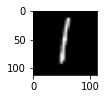

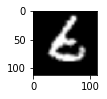

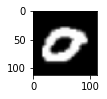

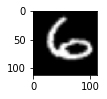

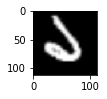

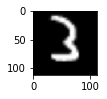

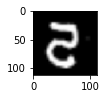

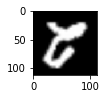

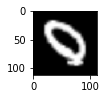

In [18]:
for x_batch, y_batch in datagen.flow(x_train_aug,y_train,batch_size=9,save_to_dir='images',save_prefix='aug',save_format='png'):
    for i in range(0,9):
        pyplot.subplot(3,3,i+1)
        pyplot.imshow(x_batch[i].reshape(wres,hres), cmap=pyplot.get_cmap('gray'))
        pyplot.show()
        if i == 9:
            print(i)
            break
    break
        